# Logistic Regression Binary Classification

Logistic regression is a fundamental machine learning method originally from the field of statistics. It's a great choice for generating a baseline for any binary classification problem (meaning there are only two outcomes). This template trains and evaluates a logistic regression model for a **binary classification** problem. If you would like to learn more about logistic regression, take a look at DataCamp's [Linear Classifiers in Python](https://app.datacamp.com/learn/courses/linear-classifiers-in-python) course.

To swap in your dataset in this template, the following is required:
- There's at least one feature column and a column with a binary categorical target variable you would like to predict.
- The features have been cleaned and preprocessed, including categorical encoding.
- There are no NaN/NA values. You can use [this template to impute missing values](https://app.datacamp.com/workspace/templates/recipe-python-impute-missing-data) if needed.

The placeholder dataset in this template consists of churn data from a telecom company. Each row represents a customer over a year and whether the customer churned (the target variable; `1` = yes, `0` = no). You can find more information on this dataset's source and dictionary [here](https://app.datacamp.com/workspace/datasets/dataset-python-telecom-customer-churn).

### 1. Loading packages and data

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    RocCurveDisplay,
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Load the data and replace with your CSV file path
df = pd.read_csv("data/customer_churn.csv")
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of SMS,Distinct Called Numbers,Age,Churn
0,8,0,38,0,4370,5,17,30,0
1,0,0,39,0,318,7,4,25,0
2,10,0,37,0,2453,359,24,30,0
3,10,0,38,0,4198,1,35,15,0
4,3,0,38,0,2393,2,33,15,0
...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,92,44,25,0
3146,17,0,17,1,9237,80,42,55,0
3147,13,0,18,4,3157,38,21,30,0
3148,7,0,11,2,4695,222,12,30,0


In [2]:
# Check if there are any null values
print(df.isnull().sum())

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of SMS           0
Distinct Called Numbers    0
Age                        0
Churn                      0
dtype: int64


In [3]:
# Check columns to make sure you have feature(s) and a target variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Call  Failure            3150 non-null   int64
 1   Complains                3150 non-null   int64
 2   Subscription  Length     3150 non-null   int64
 3   Charge  Amount           3150 non-null   int64
 4   Seconds of Use           3150 non-null   int64
 5   Frequency of SMS         3150 non-null   int64
 6   Distinct Called Numbers  3150 non-null   int64
 7   Age                      3150 non-null   int64
 8   Churn                    3150 non-null   int64
dtypes: int64(9)
memory usage: 221.6 KB


### 2. Splitting and standardizing the data
To split the data, we'll use the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. Then, we'll standardize the input data using [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) (note: this should be done after splitting the data to avoid data leakage). To learn more about standardizing data and preprocessing techniques, visit DataCamp's [Preprocessing for Machine Learning in Python](https://app.datacamp.com/learn/courses/preprocessing-for-machine-learning-in-python).

In [4]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df.iloc[:, 0:8]  # Specify at least one column as a feature
y = df["Churn"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123
)

# Standardize X data based on X_train
sc = StandardScaler().fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

### 3. Building a logistic regression classifier

The following code builds a scikit-learn logistic regression classifier (`linear_model.LogisticRegression`) using the most fundamental parameters. As a reminder, you can learn more about these parameters in DataCamp's [Linear Classifiers in Python](https://app.datacamp.com/learn/courses/linear-classifiers-in-python) course and [scikit-learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [5]:
from sklearn import preprocessing

# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "penalty": "l2",  # Norm of the penalty: 'l1', 'l2', 'elasticnet', 'none'
    "C": 1,  # Inverse of regularization strength, a positive float
    "random_state": 123,
}

# Create a logistic regression classifier object with the parameters above
clf = LogisticRegression(**params)

# Train the classifer on the train set
clf = clf.fit(X_train_scaled, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test_scaled)

To evaluate this classifier, we can calculate the accuracy, precision, and recall scores. You'll have to decide which performance metric is best suited for your problem and goal.

In [6]:
# Calculate the accuracy, precision, and recall scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9068783068783068
Precision: 0.8607594936708861
Recall: 0.4689655172413793


### 4. Other evaluation methods: confusion matrix and ROC curve

We can use a confusion matrix and a receiver operating characteristic (ROC) curve to get a fuller picture of the model's performance. These are available from sklearn's [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module. 

Text(0.5, 23.52222222222222, 'Predicted label')

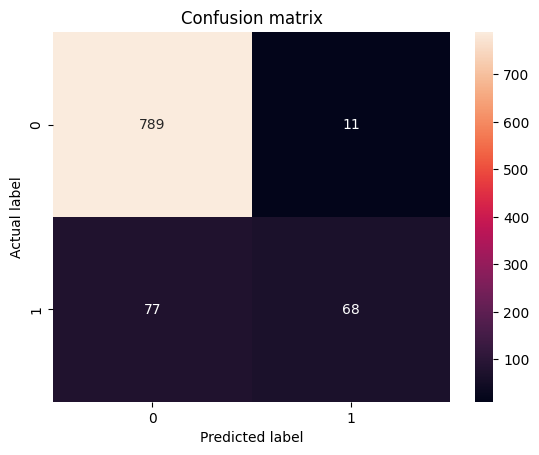

In [7]:
# Calculate confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot a labeled confusion matrix with Seaborn
sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

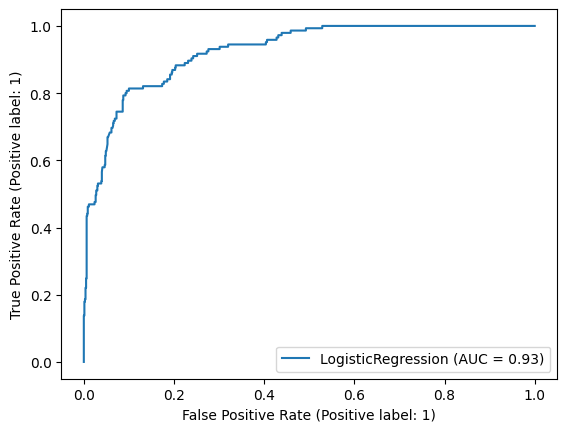

In [8]:
# Plot ROC curve
RocCurveDisplay.from_estimator(clf, X_test_scaled, y_test)